In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import os
# Check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda:0


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:


# Define the path to the root folder of dataset_2
root_folder = '/content/drive/MyDrive/Dataset_2'

# Define a mapping for the subfolder names to corresponding class labels
class_mapping = {
    'healthy': 'healthy',
    'diseased': 'diseased'
}

# Create a list to store all class-label pairs
class_label_pairs = []

# Iterate over the folders in the root folder
for class_folder in os.listdir(root_folder):
    class_path = os.path.join(root_folder, class_folder)
    # Check if the item in the root folder is a directory
    if os.path.isdir(class_path):
        # Iterate over the subfolders (healthy and diseased) in each class folder
        for subfolder in os.listdir(class_path):
            subfolder_path = os.path.join(class_path, subfolder)
            # Check if the item in the class folder is a directory
            if os.path.isdir(subfolder_path):
                # Create the class label based on the class folder name and subfolder name
                class_label = f'{class_folder}_{class_mapping[subfolder]}'
                # Append the class label and its corresponding folder path to the list
                class_label_pairs.append((class_label, subfolder_path))
# Define transforms
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])
# Load the dataset using ImageFolder and modify class labels
dataset = torchvision.datasets.ImageFolder(root=root_folder)

# Modify class labels based on the class-label pairs
dataset.classes = [label for _, label in class_label_pairs]
dataset.class_to_idx = {label: idx for idx, (class_name, label) in enumerate(class_label_pairs)}

In [3]:
from torch.utils.data import random_split
# Define the size of the training, validation, and test sets
train_size = int(0.7 * len(dataset))
validation_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - validation_size

# Split the dataset into training, validation, and test sets
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

# Apply transformations to train and test datasets
train_dataset.dataset.transform = transform_train
validation_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

# Print the sizes of the training, validation, and test sets
print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(validation_dataset))
print("Test dataset size:", len(test_dataset))

Training dataset size: 2155
Validation dataset size: 307
Test dataset size: 617


In [5]:


# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=32, shuffle=False)
# Initialize ResNet18 model
model = models.resnet18(weights=None)
model = model.to(device)
# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

print("the number of classes is ", len(train_dataset.dataset.classes))

the number of classes is  16


Epoch [1/15], Train Accuracy: 66.13%, Train Loss: 1.3987, Valid Accuracy: 52.44%, Valid Loss: 0.7641
Epoch [2/15], Train Accuracy: 83.53%, Train Loss: 0.4749, Valid Accuracy: 50.81%, Valid Loss: 1.0236
Epoch [3/15], Train Accuracy: 88.58%, Train Loss: 0.3487, Valid Accuracy: 73.94%, Valid Loss: 0.4043
Epoch [4/15], Train Accuracy: 91.74%, Train Loss: 0.2519, Valid Accuracy: 67.75%, Valid Loss: 0.5192
Epoch [5/15], Train Accuracy: 92.06%, Train Loss: 0.2368, Valid Accuracy: 72.96%, Valid Loss: 0.3730
Epoch [6/15], Train Accuracy: 91.83%, Train Loss: 0.2477, Valid Accuracy: 58.31%, Valid Loss: 0.8943
Epoch [7/15], Train Accuracy: 92.02%, Train Loss: 0.2319, Valid Accuracy: 69.71%, Valid Loss: 0.6412
Epoch [8/15], Train Accuracy: 94.94%, Train Loss: 0.1515, Valid Accuracy: 58.31%, Valid Loss: 1.0052
Epoch [9/15], Train Accuracy: 94.80%, Train Loss: 0.1489, Valid Accuracy: 89.90%, Valid Loss: 0.1550
Epoch [10/15], Train Accuracy: 96.33%, Train Loss: 0.1285, Valid Accuracy: 48.53%, Valid Lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


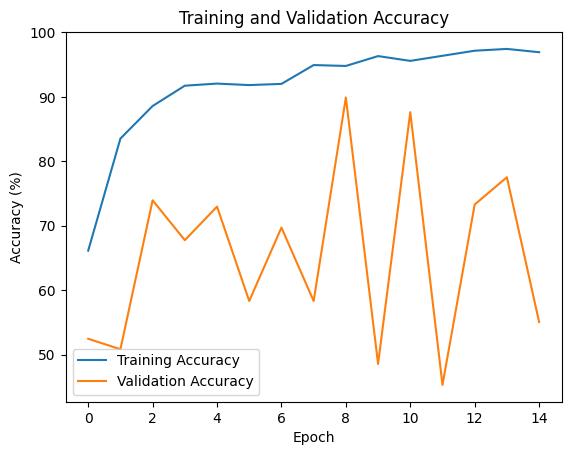

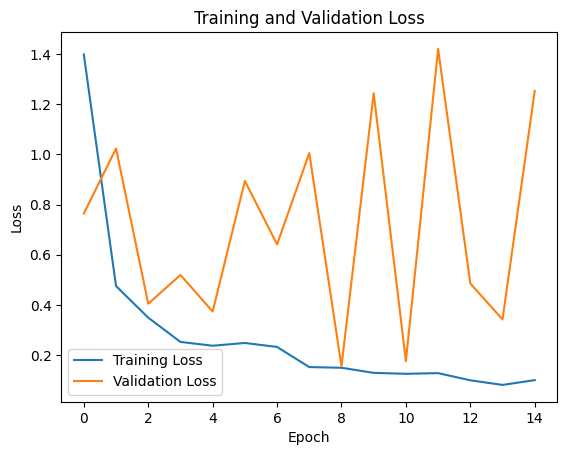

In [ ]:
# Lists to store metrics
train_accuracy_history = []
valid_accuracy_history = []
train_loss_history = []
valid_loss_history = []

# Train the model
num_epochs = 15
for epoch in range(num_epochs):
    # Training loop
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    true_labels_train = []
    predicted_labels_train = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels_train.extend(labels.cpu().numpy())
        predicted_labels_train.extend(predicted.cpu().numpy())
        running_loss += loss.item() * inputs.size(0)

    epoch_train_accuracy = 100 * correct / total
    epoch_train_loss = running_loss / len(train_dataset)
    train_accuracy_history.append(epoch_train_accuracy)
    train_loss_history.append(epoch_train_loss)

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    true_labels_valid = []
    predicted_labels_valid = []
    for inputs, labels in validation_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels_valid.extend(labels.cpu().numpy())
        predicted_labels_valid.extend(predicted.cpu().numpy())
        running_loss += loss.item() * inputs.size(0)

    epoch_valid_accuracy = 100 * correct / total
    epoch_valid_loss = running_loss / len(test_dataset)
    valid_accuracy_history.append(epoch_valid_accuracy)
    valid_loss_history.append(epoch_valid_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Accuracy: {epoch_train_accuracy:.2f}%, Train Loss: {epoch_train_loss:.4f}, Valid Accuracy: {epoch_valid_accuracy:.2f}%, Valid Loss: {epoch_valid_loss:.4f}')

# Generate classification report for training data
train_classification_report = classification_report(true_labels_train, predicted_labels_train)

# Generate classification report for validation data
valid_classification_report = classification_report(true_labels_valid, predicted_labels_valid)

# Print classification reports
print("Training Classification Report:")
print(train_classification_report)
print("Validation Classification Report:")
print(valid_classification_report)

# Plot training and validation accuracy
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(valid_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(valid_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/resnet18Dataset2_model.pth')

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load the saved model
model = models.resnet18(weights=None)
model.load_state_dict(torch.load('/content/drive/MyDrive/resnet18Dataset2_model.pth'))
model.eval()

true_labels = []
predicted_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))
# Generate classification matrix
class_matrix = confusion_matrix(true_labels, predicted_labels)
print(class_matrix)

Accuracy: 0.6191247974068071
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        99
           1       0.55      0.92      0.68        96
           2       0.98      0.96      0.97        51
           3       0.35      1.00      0.52        83
           4       0.91      0.49      0.63       109
           5       1.00      0.63      0.77        43
           6       0.00      0.00      0.00        48
           7       0.99      0.83      0.90        88

    accuracy                           0.62       617
   macro avg       0.72      0.61      0.58       617
weighted avg       0.75      0.62      0.58       617



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Load the saved model
model = models.resnet18(weights=None)
model.load_state_dict(torch.load('/content/drive/MyDrive/resnet18Dataset2_model.pth'))
# Get features from the penultimate layer of the model
features = []
all_labels = []
model.eval()
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        features.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

features = np.array(features)
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)
# Plot t-SNE visualization
plt.figure(figsize=(8, 8))
for class_idx in range(len(train_dataset.dataset.classes)):
    plt.scatter(embedded_features[np.array(all_labels) == class_idx, 0],
                embedded_features[np.array(all_labels) == class_idx, 1],
                label=f'Class {class_idx}', alpha=0.5)
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


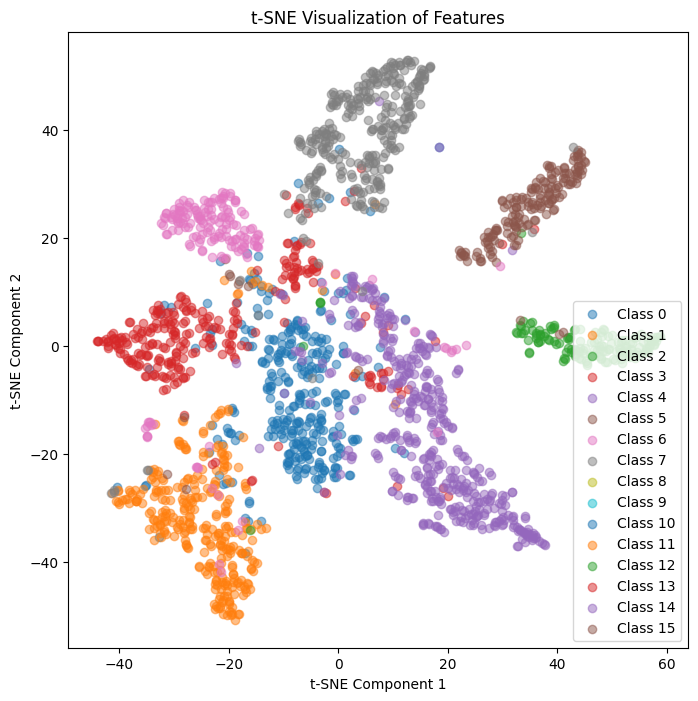

In [10]:
# Plot t-SNE visualization
plt.figure(figsize=(8, 8))
for class_idx in range(len(train_dataset.dataset.classes)):
    plt.scatter(embedded_features[np.array(all_labels) == class_idx, 0],
                embedded_features[np.array(all_labels) == class_idx, 1],
                label=f'Class {class_idx}', alpha=0.5)
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [ ]:
)!cp "./drive/My Drive/Colab Notebooks/Untitled4.ipynb" ./

In [ ]:
!jupyter nbconvert --to html Untitled4.ipynb


[NbConvertApp] Converting notebook Untitled4.ipynb to html
[NbConvertApp] Writing 695637 bytes to Untitled4.html
